In [1]:
import os
import sys
sys.path.append("../models")
sys.path.append("../py_utils")

import torch
from torch.autograd import Variable

from ipywidgets import interact, fixed
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# First, the env variables needed from path.sh
os.environ["LOGS"] = "/data/sls/scratch/atitus5/meng/logs"
os.environ["MODELS"] = "/data/sls/scratch/atitus5/meng/models"
os.environ["FEATS"] = "/data/sls/scratch/atitus5/meng/feats"

# Now, from models/base_config.sh
os.environ["FEAT_DIM"]="40"      # 40-dim Mel filter bank
os.environ["LEFT_CONTEXT"]="7"
os.environ["RIGHT_CONTEXT"]="7"
os.environ["OPTIMIZER"]="Adam"
os.environ["LEARNING_RATE"]="0.0005"
os.environ["EPOCHS"]="35"
os.environ["BATCH_SIZE"]="128"

channels=[128,256]
kernels=[5,3]
downsamples=[2,0]
os.environ["CHANNELS_DELIM"]="_%s" % ("_".join(map(str, channels)))
os.environ["KERNELS_DELIM"]="_%s" % ("_".join(map(str, kernels)))
os.environ["DOWNSAMPLES_DELIM"]="_%s" % ("_".join(map(str, downsamples)))

latent_dim=512
os.environ["LATENT_DIM"]=str(latent_dim)

os.environ["USE_BATCH_NORM"]="false"

phones_fc=[512,512]
os.environ["PHONE_FC_DELIM"]="_%s" % ("_".join(map(str, phones_fc)))
os.environ["NUM_PHONES"]="2020"

os.environ["CLEAN_DATASET"]="timit_clean"
os.environ["CLEAN_FEATS"]="%s/%s" % (os.environ["FEATS"], os.environ["CLEAN_DATASET"])

os.environ["DIRTY_DATASET"]="timit_dirty_100_rir"
os.environ["DIRTY_FEATS"]="%s/%s" % (os.environ["FEATS"], os.environ["DIRTY_DATASET"])

os.environ["EXPT_NAME"]="C%s_K%s_P%s_LATENT_%s_PHONE_FC_%s/BN_%s_OPT_%s_LR_%s_EPOCHS_%s_BATCH_%s" % (os.environ["CHANNELS_DELIM"],
                                                                                                     os.environ["KERNELS_DELIM"],
                                                                                                     os.environ["DOWNSAMPLES_DELIM"],
                                                                                                     os.environ["LATENT_DIM"],
                                                                                                     os.environ["PHONE_FC_DELIM"],
                                                                                                     os.environ["USE_BATCH_NORM"],
                                                                                                     os.environ["OPTIMIZER"],
                                                                                                     os.environ["LEARNING_RATE"],
                                                                                                     os.environ["EPOCHS"],
                                                                                                     os.environ["BATCH_SIZE"])

os.environ["MODEL_DIR"]="%s/%s/%s" % (os.environ["MODELS"], os.environ["DIRTY_DATASET"], os.environ["EXPT_NAME"])

# Check that the environment variables worked
print("Using experiment %s" % os.environ["EXPT_NAME"])

Using experiment C_128_256_K_5_3_P_2_0_LATENT_512_PHONE_FC__512_512/BN_false_OPT_Adam_LR_0.0005_EPOCHS_35_BATCH_128


In [3]:
# Set up file paths for histograms
dirty_dataset = "timit_dirty_100_rir"
log_dir="%s/%s/%s" % (os.environ["LOGS"], dirty_dataset, os.environ["EXPT_NAME"])
model_type = "multitask_md"

dev_histogram_path = "%s/%s_dev.histogram" % (log_dir, model_type)
dev_pre_dist = []
dev_post_dist = []
with open(dev_histogram_path, 'r') as dev_histogram_file:
    for line in dev_histogram_file:
        pre_dist, post_dist = list(map(float, line.strip().split(" ")))[0:2]
        dev_pre_dist.append(pre_dist)
        dev_post_dist.append(post_dist)
print("%d dev histograms set up" % len(dev_pre_dist))
        
test_histogram_path = "%s/%s_test.histogram" % (log_dir, model_type)
test_pre_dist = []
test_post_dist = []
with open(test_histogram_path, 'r') as test_histogram_file:
    for line in test_histogram_file:
        pre_dist, post_dist = list(map(float, line.strip().split(" ")))[0:2]
        test_pre_dist.append(pre_dist)
        test_post_dist.append(post_dist)
print("%d test histograms set up" % len(test_pre_dist))

print("Set up all histogram files")

122487 dev histograms set up
57919 test histograms set up
Set up all histogram files


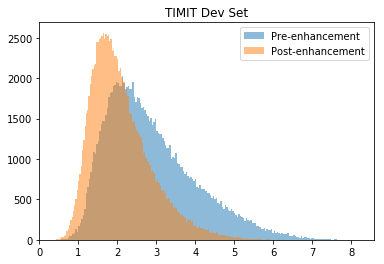

In [4]:
# DEV SET HISTOGRAMS
nbins = 200
plt.hist(dev_pre_dist, nbins, alpha=0.5, label="Pre-enhancement")
plt.hist(dev_post_dist, nbins, alpha=0.5, label="Post-enhancement")
plt.legend(loc='upper right')
plt.title("TIMIT Dev Set")
plt.show()

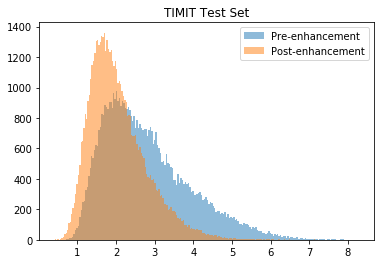

In [5]:
# TEST SET HISTOGRAMS
nbins = 200
plt.hist(test_pre_dist, nbins, alpha=0.5, label="Pre-enhancement")
plt.hist(test_post_dist, nbins, alpha=0.5, label="Post-enhancement")
plt.legend(loc='upper right')
plt.title("TIMIT Test Set")
plt.show()